In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Load and preview the dataset
# Importing pandas 
import pandas as pd
# reading csv file using pandas
df = pd.read_csv("high-school-directory.csv")


dbn                                                                  27Q650
school_name               High School for Construction Trades, Engineeri...
borough                                                              Queens
building_code                                                          Q650
phone_number                                                   718-846-6280
                                                ...                        
zip_codes                                                           24012.0
community_districts                                                      46
borough_boundaries                                                        3
city_council_districts                                                   46
police_precincts                                                         60
Name: 100, Length: 69, dtype: object

In [17]:
# Clean column names
new_col_names=[]
for col in df.columns:
        stripped_name=col.lower().strip().replace(' ','_')
        new_col_names.append(stripped_name)
df.columns=new_col_names
df.head()
new_col_names

['dbn',
 'school_name',
 'borough',
 'building_code',
 'phone_number',
 'fax_number',
 'grade_span_min',
 'grade_span_max',
 'expgrade_span_min',
 'expgrade_span_max',
 'bus',
 'subway',
 'primary_address_line_1',
 'city',
 'state_code',
 'postcode',
 'website',
 'total_students',
 'campus_name',
 'school_type',
 'overview_paragraph',
 'program_highlights',
 'language_classes',
 'advancedplacement_courses',
 'online_ap_courses',
 'online_language_courses',
 'extracurricular_activities',
 'psal_sports_boys',
 'psal_sports_girls',
 'psal_sports_coed',
 'school_sports',
 'partner_cbo',
 'partner_hospital',
 'partner_highered',
 'partner_cultural',
 'partner_nonprofit',
 'partner_corporate',
 'partner_financial',
 'partner_other',
 'addtl_info1',
 'addtl_info2',
 'start_time',
 'end_time',
 'se_services',
 'ell_programs',
 'school_accessibility_description',
 'number_programs',
 'priority01',
 'priority02',
 'priority03',
 'priority04',
 'priority05',
 'priority06',
 'priority07',
 'priori

In [20]:
#filtering out data less  than 300
total_students_gr_300= df[df['total_students']>300]

In [21]:
total_students_gr_300

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12
5,02M305,"Urban Assembly Academy of Government and Law, The",Manhattan,M445,212-505-0745,212-674-8021,9.0,12,NaN,NaN,...,1.0,18.0,1005283.0,1.004080e+09,Chinatown ...,11723.0,70,4,32,4
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,02M300,Urban Assembly School of Design and Constructi...,Manhattan,M535,212-586-0981,212-586-1731,9.0,12,NaN,NaN,...,3.0,135.0,1083802.0,1.010790e+09,Clinton ...,12081.0,12,4,10,10
431,09X412,Bronx High School of Business,Bronx,X410,718-410-4060,718-992-5760,9.0,12,NaN,NaN,...,16.0,225.0,2007806.0,2.028170e+09,East Concourse-Concourse Village ...,10935.0,50,5,42,27
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53
433,02M407,Institute for Collaborative Education,Manhattan,M475,212-475-7972,212-475-0459,6.0,12,NaN,NaN,...,2.0,48.0,1020419.0,1.009220e+09,Gramercy ...,11724.0,71,4,50,7


In [26]:
df['borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [25]:
df['borough'].value_counts()

borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64

In [27]:
df.groupby(['borough'])['dbn'].nunique()

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

In [28]:
#unique schools grouping
unique_schools=df.groupby(['borough'])['dbn'].nunique().reset_index()
unique_schools

,borough,dbn
0,Bronx,118
1,Brooklyn,121
2,Manhattan,106
3,Queens,80
4,Staten Island,10


<Axes: xlabel='borough', ylabel='dbn'>

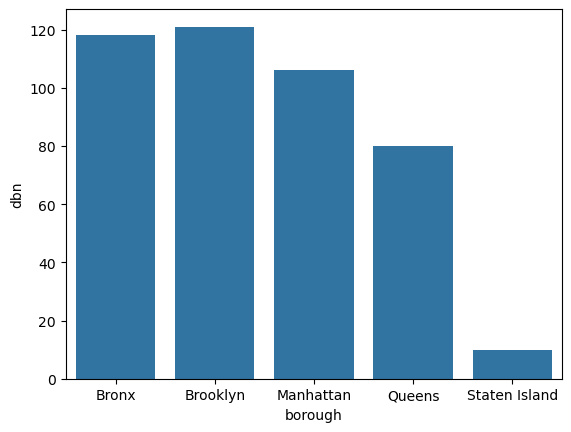

In [30]:
import seaborn as sns
sns.barplot(x="borough", y="dbn", data=unique_schools)

In [ ]:
# Insights
#1. Brooklyn has highest number of the unique schools
#2. staten island has lowest number of unique schools